# 1. Data Preparation

The aim of this Jupyter Notebook is to explore a dataset that contains results from a chemical analysis of different wines. These wines are grown in the same region in Italy, however, by 3 different cultivators. The analysis determined the quantity of 13 components found in each of the wine samples.

## Reading the data:

The data set has only one table, so only one table needs to be opened by the pandas library.

In [237]:
import pandas as pd

wine_data = pd.read_csv(filepath_or_buffer='wine.csv')

wine_data.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,1.0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,1.0,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,1.0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,1.0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,1.0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Above is the first 10 rows of the wine data to get a basic idea of what the dataset contains. With the data loaded into pandas, we can see the wine dataset has 13 attributes:

1. Wine type (1-3)
2. Alcohol content
3. Malic acid content
4. Ash content
5. Alcalinity of ash
6. Magnesium
7. Total phenols
8. Flavanoids
9. Nonflavanoid phenols
10. Proanthocyanins
11. Colour intensity
12. Hue
13. OD280/OD315 of diluted wines
14. Proline

More information on the dataset can be found using the following code:

In [238]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  177 non-null    float64
 1   Alcohol               175 non-null    float64
 2   Malic.acid            177 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   171 non-null    float64
 5   Mg                    177 non-null    float64
 6   Phenols               174 non-null    float64
 7   Flavanoids            174 non-null    float64
 8   Nonflavanoid.phenols  177 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             172 non-null    float64
 11  Hue                   178 non-null    object 
 12  OD                    177 non-null    float64
 13  Proline               171 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


As seen from the information table above, it is observed that the dataset has 178 columns.

From the column 'Non-Null Count', the attributes ash, proanth and hue are the only attributes with 179 values (0-178). This could be due to a number of things including, incorrect formatting to the datatype, missing data values/entries, or duplicated entries skewing the data.

## Handling the data quality issues:

The simpliest first step is to check whether the dataset has duplicated data and remove it from the dataset.

In [239]:
wine_data.duplicated().sum()

0

This shows no data entries are duplicates within the original data. Therefore, this issue does not need to be further explored.

The next step to prepare the data is to check for the possible missing data within the dataset.

In [240]:
wine_data.isna().sum()

Wine                    1
Alcohol                 3
Malic.acid              1
Ash                     0
Acl                     7
Mg                      1
Phenols                 4
Flavanoids              4
Nonflavanoid.phenols    1
Proanth                 0
Color.int               6
Hue                     0
OD                      1
Proline                 7
dtype: int64

 As observed above: Wine, Alcohol, Malic acid, Acl, Mg, Phenols, Flavanoids, Nonflavanoid phenols, colour, OD and Proline must be further explored.

### Wine:

In [241]:
wine_data['Wine'].value_counts()

Wine
2.0    71
1.0    59
3.0    47
Name: count, dtype: int64

Above shows the number of values for each type of wine. It is impossible to know which wine type has the missing value.

Pandas has the function .ffill(), which can fill a cell value with the next valid value from a future cell. This means without knowing which column has the missing value, this value can be filled with the next value. Which will be effective at keeping the cells that belong to a specific type, together.

In [242]:
wine_data['Wine'] = wine_data['Wine'].replace("", None).ffill()

wine_data['Wine'].value_counts()

Wine
2.0    71
1.0    59
3.0    48
Name: count, dtype: int64

As observed, type 3 had the missing value. Which has now been imputed into the dataset.

### The Remaining Missing Values

The remaining missing fields are all measurements taken. So for every missing cell in each column, the group mean of the different types of wine can be used to fill all missing cells for each column.

In [243]:
attrs = ['Alcohol', 'Malic.acid', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
         'Nonflavanoid.phenols', 'Color.int', 'OD', 'Proline']

# Iterate through each column and fill NaN values with group means
for column in attrs:
    wine_data[column] = wine_data.groupby('Wine')[column].transform(lambda x: x.fillna(x.mean()))

wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    float64
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    float64
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    object 
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


In [244]:
wine_data.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

As seen above from both the info table, and the number of missing values table. All missing cells have been filled for each column using the group mean. This was deemed effective as it keeps data between groups similar to their respective group, attempting to only minimally change any possible correlations or information within the dataset.

# 2. Exploratory Data Analysis

This section of the Jupyter Notebook of the exploration of this dataset, is performing univariate and bivariate data analysis on columns of interest in the dataset.

The attributes that have been deemed to be of interest for univariate analysis are: Alcohol, Ash, Flavanoids and Hue.

## Univariate Analysis

In univariate EDA, the columns of interest will be explored in isolation to identify their distributions, and possible further data quality issues.

### Alcohol Content

In [245]:
wine_data['Alcohol'].describe()

count    178.000000
mean      13.005918
std        0.809973
min       11.030000
25%       12.362500
50%       13.050000
75%       13.687500
max       14.830000
Name: Alcohol, dtype: float64

<Axes: title={'center': 'Distribution of Alcohol Content'}, ylabel='Frequency'>

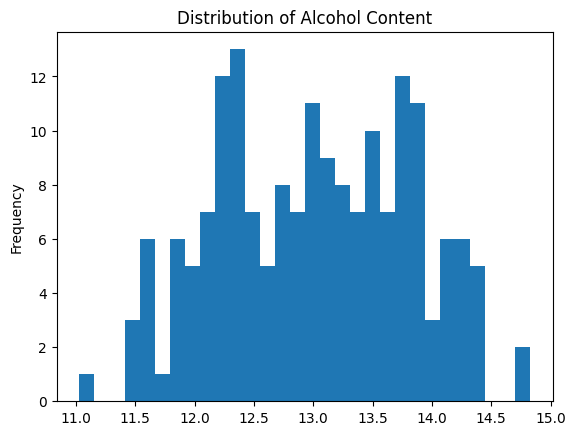

In [246]:
wine_data['Alcohol'].plot.hist(grid=False, bins=30, title="Distribution of Alcohol Content")

From the plot above, it can be observed that all the wine types have an alcohol content between 11.0% and 14.75%. Showing a multimodal distribution at an alcohol content of 12.25% and 13.75%.

### Ash

In [268]:
wine_data['Ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: Ash, dtype: float64

<Axes: title={'center': 'Distribution of Ash'}>

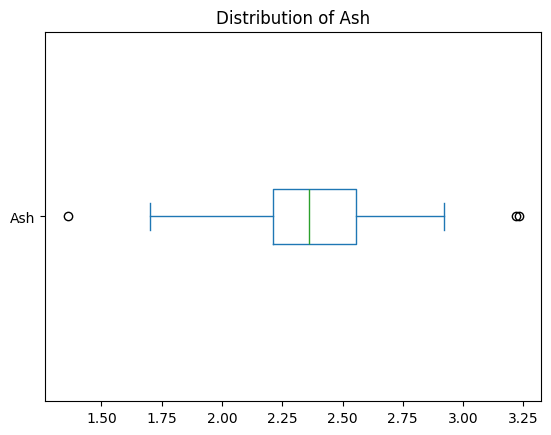

In [270]:
wine_data['Ash'].plot.box(vert=False, title="Distribution of Ash")

The box and whisker plot has pointed out outliers in the ash data. To clean this data, using the mean of the data to replace the values greater and smaller than the upper and lower bounds of the whiskers.

In [272]:
import numpy as np

ash_mean = wine_data['Ash'].mean()
ash = 'Ash'

wine_data[ash] = np.where(wine_data[ash] > 3, ash_mean, wine_data[ash])
wine_data[ash] = np.where(wine_data[ash] < 1.6, ash_mean, wine_data[ash])

wine_data[ash].describe()

count    178.000000
mean       2.362526
std        0.247381
min        1.700000
25%        2.212500
50%        2.360000
75%        2.540000
max        2.920000
Name: Ash, dtype: float64

Now using a density plot we can further explore the data.

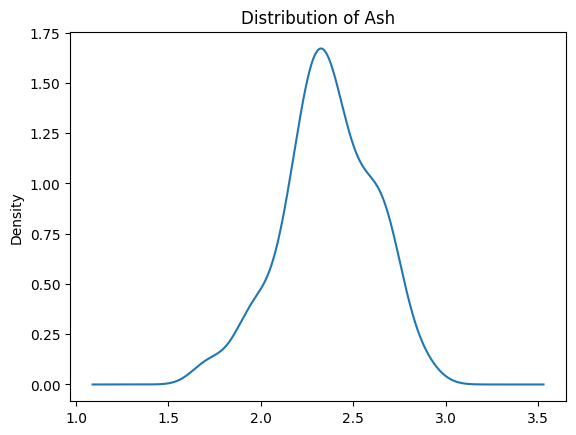

In [273]:
import seaborn as sns

wine_data['Ash'].plot.density()
plt.title('Distribution of Ash')
plt.show()

The distribution of ash shows a unimodal distribution of the data. This data can be observed to be fairly symmetric, with it's peak density at approximately 2.25 g/l.

### Flavanoids

In [249]:
wine_data['Flavanoids'].describe()

count    178.000000
mean       2.029622
std        0.994706
min        0.340000
25%        1.205000
50%        2.110000
75%        2.875000
max        5.080000
Name: Flavanoids, dtype: float64

<Axes: title={'center': 'Distribution of Flavanoids'}, ylabel='Frequency'>

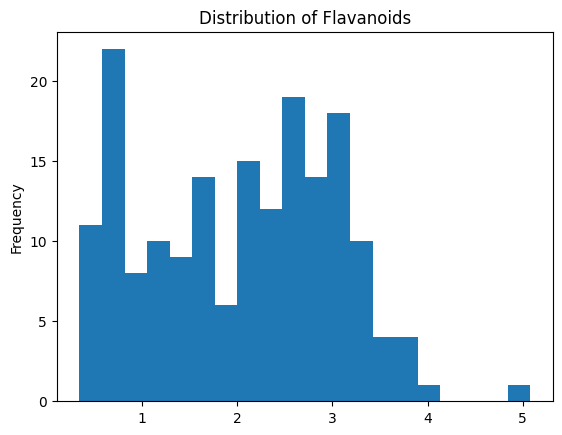

In [250]:
wine_data['Flavanoids'].plot.hist(grid=False, bins=20, title="Distribution of Flavanoids")

As the max value of the flavanoids was 5.08, while the min was 0.34, the data was suspicious. Furthermore, given that the 75th percentile of data was within 2.87, it is probable that the flavanoids data has an outlier that is skewing the data.

Seen from the plot above, there is one data value approximately around the 5.0 mark. From this is can be discerned that this data point is definitely an outlier.

There are two solutions to improve the data quality. Removing the entire row of data from the wine_data set, or replace the data point with an average of the data. As removing an entire row from the data set could alter other aspects of the data, it is better to replace this data point with the average of the flavanoids data.

In [251]:
import numpy as np

flav_mean = wine_data['Flavanoids'].mean()
flav = 'Flavanoids'

wine_data[flav] = np.where(wine_data[flav] > 4.5, flavanoids_mean, wine_data[flav])

<Axes: title={'center': 'Distribution of Flavanoids'}, ylabel='Frequency'>

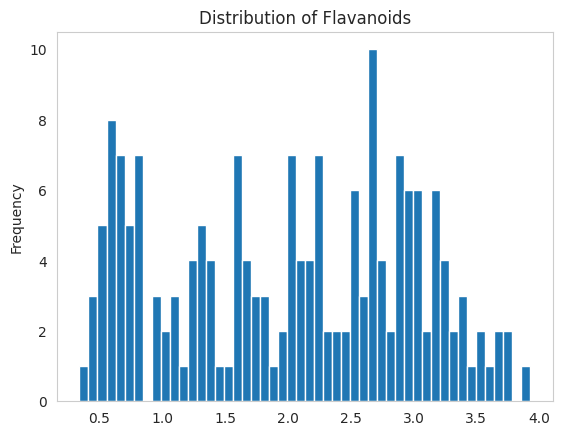

In [705]:
wine_data['Flavanoids'].plot.hist(grid=False, bins=50, title="Distribution of Flavanoids")

This outlier has been replaced as to be the mean of the Flavanoids data, cleaning the data.

It can be observed that the highest proportion of the wines have between 0.5mg and 1.0mg of flavanoids. However, the remainder of the data has variable frequency of the amount of flavanoids between 1.2mg and 3.9mg.

### Hue

In [253]:
wine_data['Hue'].describe()

count      178
unique      79
top       1.04
freq         8
Name: Hue, dtype: object

As seen from the description above, the Hue attribute has mistakenly been loaded as an object data type. This is incorrect as the hue is a measurement and can be loaded as a float. From inference, this could be due to a float value being loaded with a comma (',') instead of a decimal change. Meaning the entire attribute must be loaded as an object instead of a float.

In [254]:
wine_data['Hue'] = wine_data['Hue'].str.replace(',','.')
wine_data['Hue'] = pd.to_numeric(wine_data['Hue'])

wine_data['Hue'].describe()

count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: Hue, dtype: float64

Now that the data is a float type, plots that require numeric values can be used.

<Axes: title={'center': 'Distribution of Hue'}>

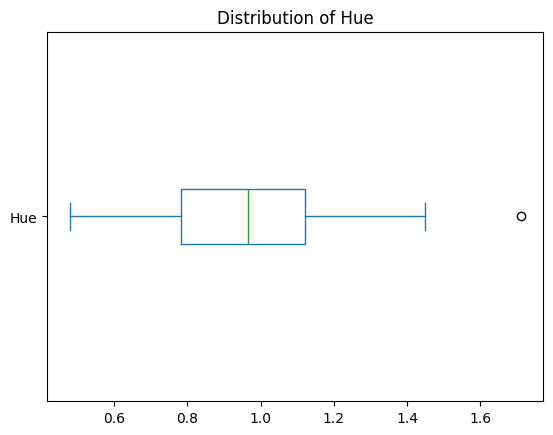

In [255]:
wine_data['Hue'].plot.box(vert=False, title="Distribution of Hue")

According to the box and whisker plot, this attribute has an outlier in the data. Similarly to the flavanoids the same method will be appiled, replacing the outlier with the mean hue.

<Axes: title={'center': 'Distribution of Hue'}>

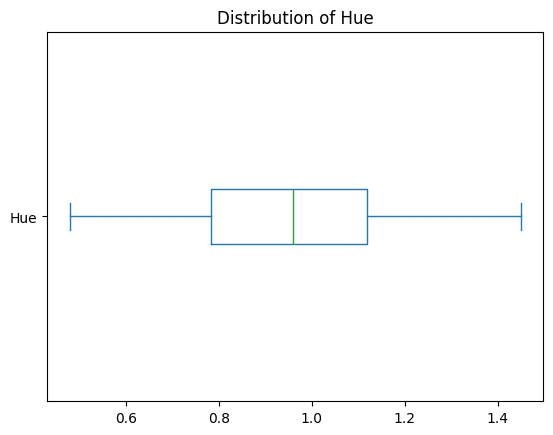

In [256]:
import numpy as np

hue_mean = wine_data['Hue'].mean()

wine_data['Hue'] = np.where(wine_data['Hue'] > 1.5, hue_mean, wine_data['Hue'])

wine_data['Hue'].plot.box(vert=False, title="Distribution of Hue")

## Bivariate Analysis

In bivaraite EDA, more columns of interest will be explored in conjunction to another to identify their distributions, correlations, and possible further data quality issues.

In [280]:
numeric_data = wine_data[['Color.int', 'Malic.acid', 'Ash', 'Hue', 'Alcohol',
                          'Phenols', 'Flavanoids']]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,Color.int,Malic.acid,Ash,Hue,Alcohol,Phenols,Flavanoids
Color.int,1.000000,0.260741,0.259511,-0.516949,0.559227,-0.061477,-0.179746
Malic.acid,0.260741,1.000000,0.161244,-0.572325,0.099559,-0.342891,-0.422749
Ash,0.259511,0.161244,1.000000,-0.076001,0.251365,0.095483,0.022542
Hue,-0.516949,-0.572325,-0.076001,1.000000,-0.032516,0.446134,0.575733
Alcohol,0.559227,0.099559,0.251365,-0.032516,1.000000,0.287699,0.278594
Phenols,-0.061477,-0.342891,0.095483,0.446134,0.287699,1.000000,0.866736
Flavanoids,-0.179746,-0.422749,0.022542,0.575733,0.278594,0.866736,1.000000


From above in the correlation table, ranging from bright yellow to a dark red, is the numerical correlation between the 6 selected attributes of the wine data set. Noteable correlations that can be explored for bivariate exploratory data analysis are: Flavanoids vs. Phenols, Alcohol vs. Color, and Malic.acid vs. Hue.

### Flavanoids vs Phenols

From some basic research, it was discovered that there is often a correlation between the amounts of flavanoids and the total phenols in wine. Since flavanoids are a significant subgroup of phenols, the total phenolic content of a wine typically reflects its flavanoids content to some degree (Visioli et al., 2020).

This can be further explored in the plot below.

<Axes: xlabel='Flavanoids', ylabel='Phenols'>

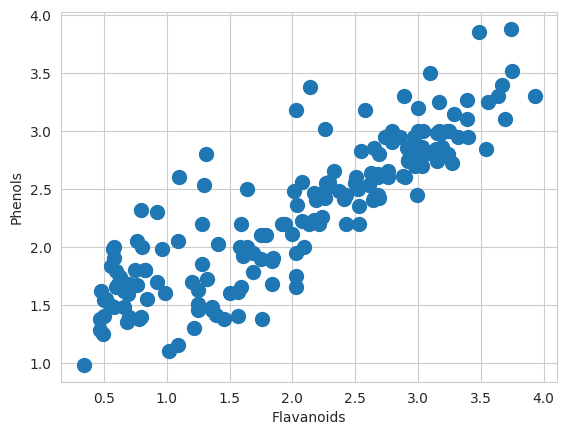

In [1180]:
wine_data[['Flavanoids', 'Phenols']].plot.scatter(x='Flavanoids',y='Phenols', s=100)


From the scatter plot, it is observed that as the flavanoid content increases, the total phenol content in the wine increases. Showing the discovered correlation.

### Alcohol vs. Color

According to sources online, there is generally no direct correlation between the alcohol content and the colour of wine. The alcohol content of wine is primarily determined by the sugar content of the grapes at harvest and the fermentation process, while the color of wine is influenced by the types and concentrations of pigments. Particularly, anthocyanins in red wines and the winemaking techniques used (Green, 2015).

It was deemed to be interesting to explore if this relationship holds in the explored wine dataset.

<Axes: xlabel='Alcohol', ylabel='Color.int'>

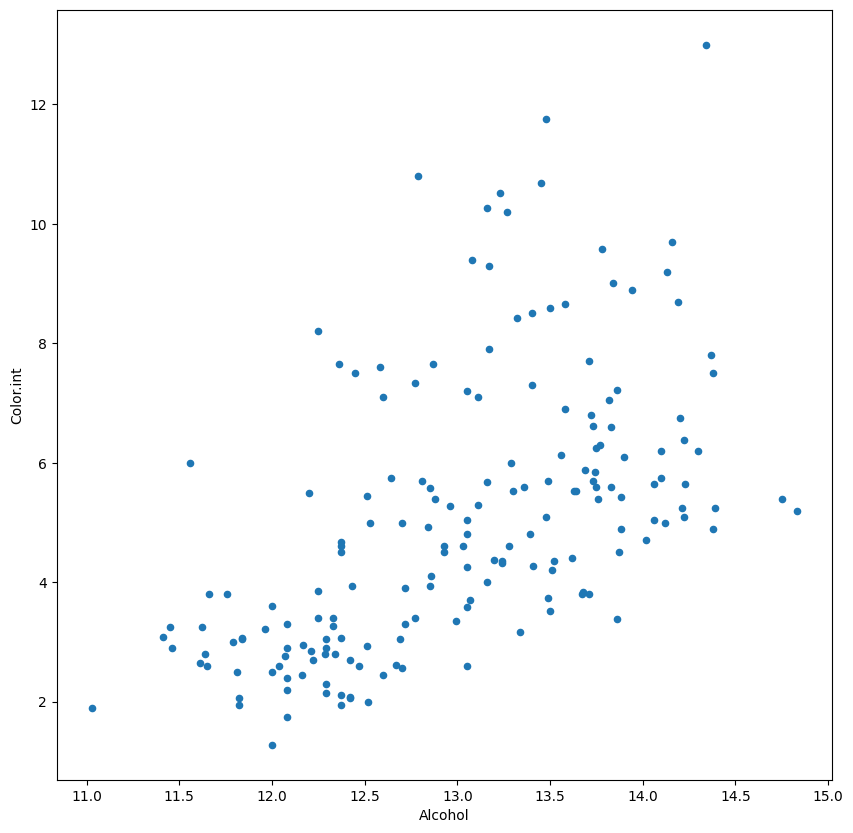

In [304]:
df = pd.DataFrame(wine_data, columns=['Alcohol', 'Color.int'])
df.plot(x='Alcohol', y='Color.int', kind="scatter", figsize=(10, 10))

As seen from the plot, there is a noticable relationship between the alcohol content and he color of the wine. More clearly seen in the lower ares of the plot, there is a somewhat linear relationship. However, as the alcohol content increases, the variation in the color increases.

### Malic Acid vs. Hue

The relationship between Malic Acid and Hue is complex. There isn't a direct, simple correlation between malic acid content and the hue of wine. 

However, malic acid affects the wine's acidity, which can influence its color. Higher malic acid levels typically mean higher acidity, leading to brighter red hues. If malolactic fermentation occurs, converting malic acid to lactic acid, the wine's acidity decreases, potentially muting its color slightly (Hale, 2024).

The relationship is complex and influenced by factors like grape ripeness and winemaking techniques. It would be interesting to see if this data set shows evidence of this conclusion.

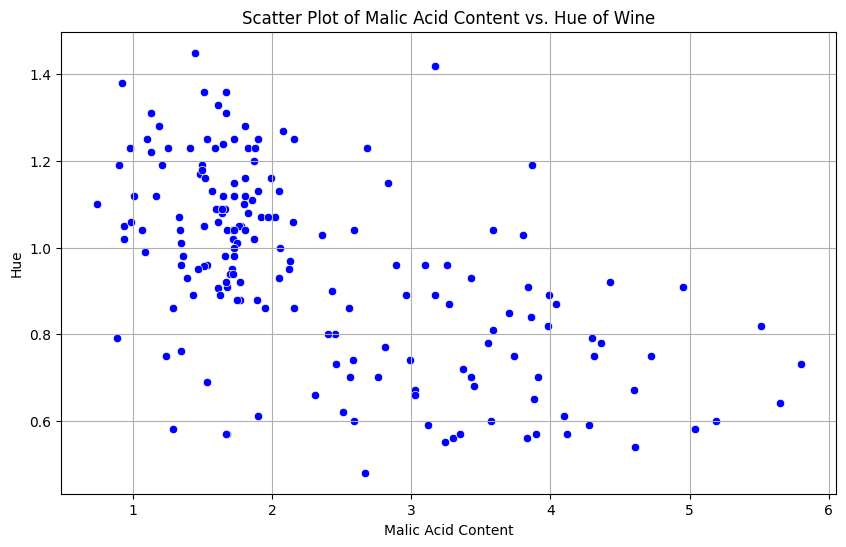

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Malic.acid', y='Hue', data=wine_data, marker='o', color='blue')

# Annotate the scatter plot
plt.title("Scatter Plot of Malic Acid Content vs. Hue of Wine")
plt.xlabel("Malic Acid Content")
plt.ylabel("Hue")
plt.grid(True)

plt.show()

The plot above resemebles a negative linear relationship. As the malic acid content of the wine increases the hue decreases. However, following the background research above, it is clear that this relationship has more variables that affects each attribute. As the variability of the data is quite large.

# 3. Mean and Standard Deviations for each Wine Cultivator

In [422]:
mean = wine_data.groupby('Wine').agg(['mean'])
mean

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Wine,,,,,,,,,,,,,
1.0,13.747931,2.010678,2.441127,17.105263,106.338983,2.840175,2.982373,0.290000,1.899322,5.532500,1.062034,3.157797,1120.912281
2.0,12.284571,1.932676,2.246803,20.186957,94.549296,2.260714,2.032109,0.363662,1.630282,3.073188,1.045682,2.785352,510.463768
3.0,13.160851,3.353830,2.437083,21.455556,99.595745,1.673404,0.791304,0.446809,1.153542,7.342979,0.682708,1.684681,629.111111


In [424]:
std = wine_data.groupby('Wine').agg(['std'])
std

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,std,std,std,std,std,std,std,std,std,std,std,std,std
Wine,,,,,,,,,,,,,
1.0,0.461477,0.688549,0.203602,2.495059,10.498949,0.338880,0.397494,0.070049,0.412109,1.197420,0.116483,0.357077,219.566837
2.0,0.535710,1.015569,0.273658,3.325139,16.753497,0.545140,0.604305,0.123961,0.602068,0.908867,0.187361,0.496573,145.534932
3.0,0.527954,1.078974,0.184690,2.202084,10.712211,0.355044,0.289450,0.124047,0.408836,2.281280,0.114441,0.271997,110.363466


### Observations of Mean and Standard Deviation For the 3 Wine Cultivators

#### Observations of the Means
Observing the means of the three groups, the $1^{st}$ cultivator of the wines has the highest alcohol content. Where the $2^{nd}$ cultivator has the least alcohol content, with a difference of 1.47%.

The mean of the malic acid content between the three cultivators has significant differences between cultivator 3 when compared to cultivators 1 and 2. Cultivator 3 has a much higher content of malic acid in their wines, having a value of 3.35 (g/L). With the next closest mean being cultivator 1 with 2.01 (g/L). Showing a difference of 1.34 (g/L).


For the magnesium content, wine 1 Has the highest mean at approximately 106.34 mg/L. This suggests that Wine 1 is richer in magnesium compared to the other wines. Wine 2 has the lowest mean magnesium content at approximately 94.55 mg/L. Wine 3 falls in between the other two, with a mean magnesium content of 99.60 mg/L. 

The relatively higher magnesium content in Wine 1 might influence its taste, stability, and mouthfeel (Bonin 2014). The lower magnesium content in Wine 2 might result in a different taste profile, potentially less robust in certain mineral notes compared to Wine 1. Being closer to the average of the three, Wine 3 might exhibit characteristics that are more balanced or intermediate in terms of magnesium-related properties.

Proline is an amino acid commonly found in wine, and its concentration can significantly influence the wine's flavor, aroma, and texture (Nandorfy et al., 2022). Wine 1 has a significantly higher mean proline content (219.57 mg/L) compared to Wine 2 and Wine 3 (both 145.53 mg/L). Higher levels of proline are often associated with a richer, more complex flavour profile, as well as contributes to the sweetness and overall balance of the wine. Both Wine 2 and Wine 3 have lower, identical mean proline content, suggesting they might have a more straightforward or less complex flavor profile compared to Wine 1.


#### Observations of the Standard Deviations
A few of the most meaningful observations that show apparent differences in the data from the standard deviations are:

Phenols and Flavanoids show a considerable range in values. For phenols the standard deviation ranges from 0.36mg to 0.55mg, and for flavanoids the standard deviation ranges from 0.29mg/L to 0.60mg/L. Wine 2 has the greatest variability in its phenol amount, wine 2 also has the highest variability in flavanoid content. High variability in these attributes could be due to the varying wine making processes between the cultivators as well as harvest conditions or environmental factors.

The malic acid content in each type of wines shows variation from 0.688g/L to 1.079g/L. Wine 1 has the lowest variability out of the three cultivators, with 0.688g/L. Whereas, both wine 2 and wine 3 have a high standard deviation of 1.01 and 1.079 g/L. This variablity also has a range of reasons, where the most likely between the wine cultivators are grape variety, winemaking practices and the climate and weather where the wine is produced.




# 4. Correlation among the numerical columns for each cultivator

### **Cultivator 1**

In [432]:
# Cultivator 1
numeric_data = wine_data.groupby('Wine')
num = 1

corr_matrix = numeric_data.get_group(num).corr()

exclude_columns = ['Wine']

filtered_corr_matrix = corr_matrix.drop(columns=exclude_columns, errors='ignore').drop(index=exclude_columns, errors='ignore')
filtered_corr_matrix

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Alcohol,1.000000,-0.043432,-0.056567,-0.289114,0.166045,0.425463,0.411912,0.006660,0.317385,0.410078,0.075187,0.067403,0.339162
Malic.acid,-0.043432,1.000000,0.025128,0.138585,0.079317,-0.082977,-0.191278,-0.089366,-0.080798,-0.258789,-0.419981,0.173244,-0.385504
Ash,-0.056567,0.025128,1.000000,0.402753,0.305246,0.054685,-0.023629,0.334104,-0.165933,-0.088186,0.224728,-0.099579,0.061621
Acl,-0.289114,0.138585,0.402753,1.000000,0.298956,-0.212433,-0.289057,0.273696,-0.165133,-0.239316,0.053897,-0.091601,-0.146766
Mg,0.166045,0.079317,0.305246,0.298956,1.000000,0.309654,0.123332,0.237248,-0.059042,0.156235,-0.111386,0.120651,-0.167736
Phenols,0.425463,-0.082977,0.054685,-0.212433,0.309654,1.000000,0.801946,-0.016696,0.373153,0.635120,-0.225252,0.050599,0.282524
Flavanoids,0.411912,-0.191278,-0.023629,-0.289057,0.123332,0.801946,1.000000,-0.089538,0.548624,0.727004,0.007863,-0.088529,0.370925
Nonflavanoid.phenols,0.006660,-0.089366,0.334104,0.273696,0.237248,-0.016696,-0.089538,1.000000,-0.144535,-0.178507,0.411831,-0.323488,-0.025788
Proanth,0.317385,-0.080798,-0.165933,-0.165133,-0.059042,0.373153,0.548624,-0.144535,1.000000,0.432433,0.103937,0.003106,0.133060
Color.int,0.410078,-0.258789,-0.088186,-0.239316,0.156235,0.635120,0.727004,-0.178507,0.432433,1.000000,-0.032102,-0.194743,0.584967


#### Heatmap Visualisation

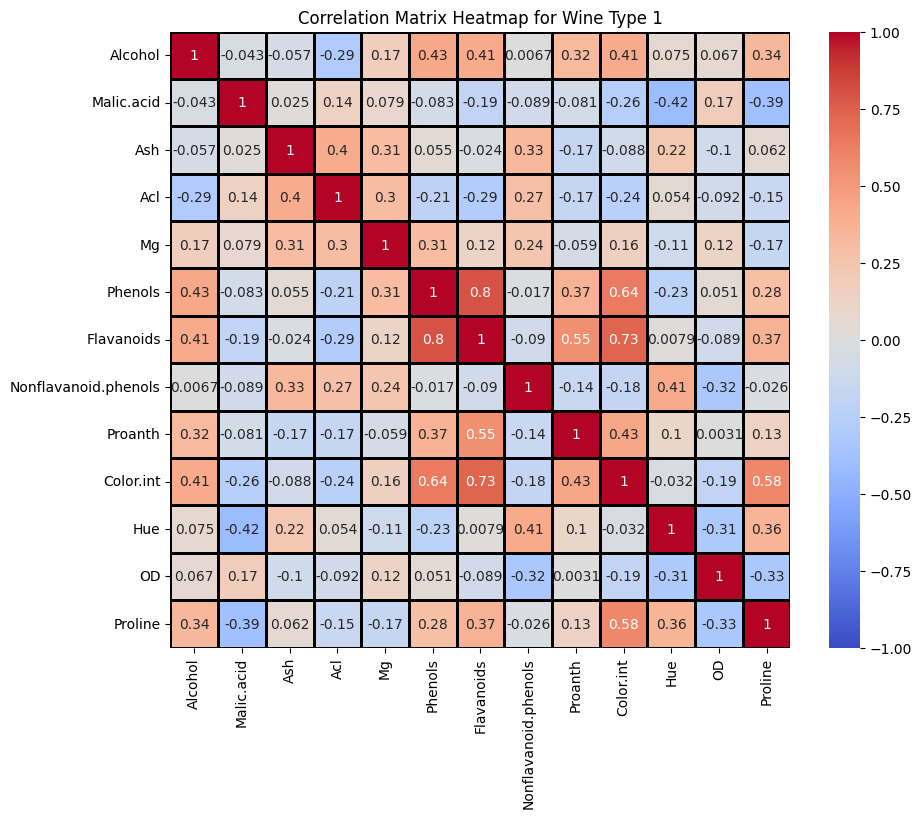

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidth=1.9, linecolor='black')
plt.title(f'Correlation Matrix Heatmap for Wine Type {num}')
plt.show()

Strong Positive Correlations (>|0.7|):
- Phenols and Flavanoids: 0.80
- Flavanoids and Color.int: 0.73

Similar to all cultivators, Phenols and Flavanoids have a strong positive relationship, indicating that high levels of phenols are associated with high levels of flavanoids. This indicates that both compounds often increase together, which is most likely due to the fact that both are phenolic compounds. Therefore, making it logical that when we see an increase in total phenols (Phenols attribute), there is a subsequent increase in flavanoid content.

Moderate Positive Correlations (|0.5-0.7|):
- Phenols and Color.int: 0.64
- Proanth and Color.int: 0.43

Moderate Negative Correlations:
- Malic.acid and Color.int: -0.29
- Hue and OD: -0.31


A similarity in this heatmap to the other cultivators explored further in the report, is that cultivator 1 does not have any strong negative correlations, which has been assigned an arbitrary value of having greater than the absolute of -0.7, or any value smaller than -0.7. This suggests that the wine of cultivator 1 has very little dependent attributes. Its speculated that this could be due to differences in the winemaking, quality and type of grape produce used, or even how the ratios of the remaining attributes react to show little effect to each other.




### **Cultivator 2**

In [434]:
# Cultivator 1
numeric_data = wine_data.groupby('Wine')
num = 2

corr_matrix = numeric_data.get_group(num).corr()

exclude_columns = ['Wine']

filtered_corr_matrix = corr_matrix.drop(columns=exclude_columns, errors='ignore').drop(index=exclude_columns, errors='ignore')
filtered_corr_matrix

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Alcohol,1.000000,0.004427,-0.173505,-0.048813,-0.038318,-0.037507,0.068545,-0.082150,-0.166917,0.263255,0.114088,-0.111834,-0.027724
Malic.acid,0.004427,1.000000,0.114861,0.248678,-0.076788,0.040123,0.124604,0.127605,0.210541,-0.183476,-0.418023,0.157838,-0.218453
Ash,-0.173505,0.114861,1.000000,0.540396,0.062532,0.032962,0.034981,0.271424,-0.074052,-0.133066,-0.000578,0.000861,-0.009630
Acl,-0.048813,0.248678,0.540396,1.000000,0.024312,0.141035,0.187829,0.177259,0.115999,-0.062914,-0.106826,0.374148,-0.155765
Mg,-0.038318,-0.076788,0.062532,0.024312,1.000000,0.069592,-0.099975,-0.194138,0.297787,0.061387,0.167915,-0.076189,0.412700
Phenols,-0.037507,0.040123,0.032962,0.141035,0.069592,1.000000,0.780237,-0.418940,0.383471,0.116008,0.020447,0.482480,-0.076575
Flavanoids,0.068545,0.124604,0.034981,0.187829,-0.099975,0.780237,1.000000,-0.339031,0.550846,0.182350,0.007343,0.544580,-0.199329
Nonflavanoid.phenols,-0.082150,0.127605,0.271424,0.177259,-0.194138,-0.418940,-0.339031,1.000000,-0.321587,0.052742,-0.108886,-0.413119,-0.108038
Proanth,-0.166917,0.210541,-0.074052,0.115999,0.297787,0.383471,0.550846,-0.321587,1.000000,-0.091199,-0.095121,0.385771,0.096605
Color.int,0.263255,-0.183476,-0.133066,-0.062914,0.061387,0.116008,0.182350,0.052742,-0.091199,1.000000,0.022995,-0.126412,0.084625


#### Heatmap Visualisation

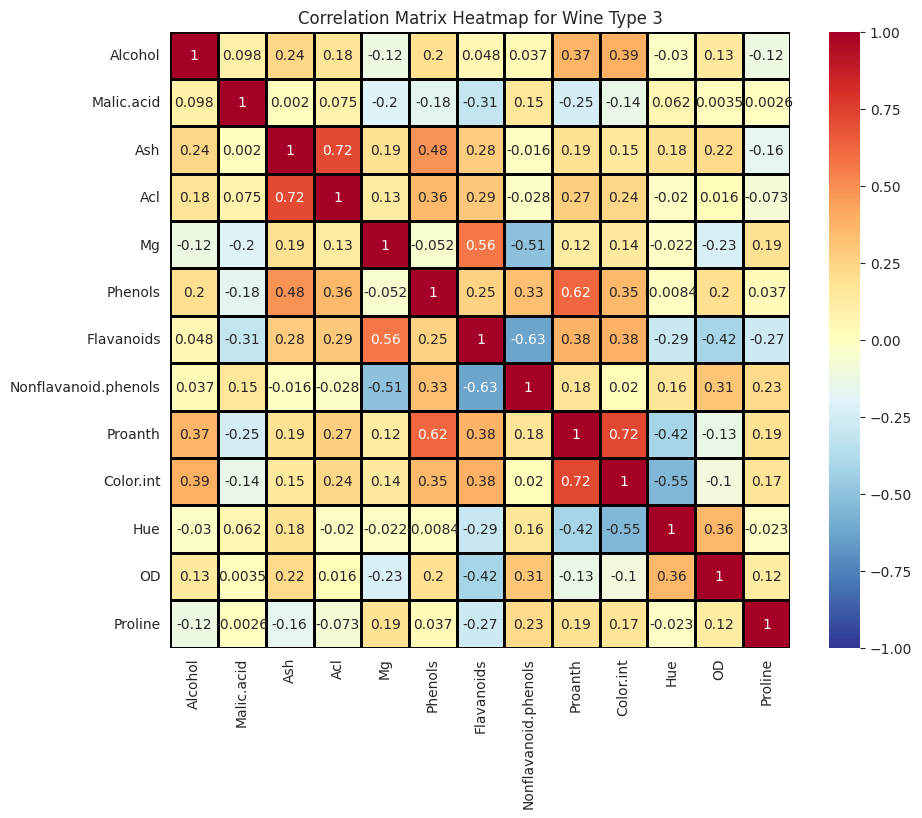

In [840]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(filtered_corr_matrix, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1, center=0, linewidth=1.9, linecolor='black')
plt.title(f'Correlation Matrix Heatmap for Wine Type {num}')
plt.show()

Strong Positive Correlations (>|0.7|):
- Phenols and Flavanoids: 0.78
- Phenols and OD: 0.48
- Flavanoids and OD: 0.55

Wine 2 also shows the trending correlation of Phenols and Flavanoids. Observed to be a continuing correlation between the different wine cultivators.

<br>

Moderate Negative Correlations (|0.4-0.7|):
- Malic.acid and Hue: -0.42
- Nonflavanoid.phenols and Phenols: -0.42

Malic acid and hue have a moderate negative correlation, suggesting that as the malic acid content increases, the hue of the wine decreases. Seen from the data previously plotted in the bivariate data analysis, this correlation was expected to be moderate, as there is high variability within the data.

It is difficult to find any information online about how malic acid affects the hue of wine. Although according to a source 'Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue' (Hale, 2024). This corroborates the possibility of having a correlation, however as the dataset doesn't measure the acidity of the wine, correlation is still only moderate matching the data.

Notable Moderate Correlations:
- Ash and Acl: 0.54
- Ash and Color.int: 0.26
- Proanth and Color.int: 0.39
- Proanth and OD: 0.39


Similarly to cultivator 1, cultivator 2 has no strong negative correlations. Although this group has the highest number of notable moderate correlations (values between/around |0.3-0.7|).
This shows that unlike the other cultivators, wine cultivator 2 has the most variability in the correlations between attributes, showing that the components don't necessarily have relations to each other.

### **Cultivator 3**

In [436]:
# Cultivator 1
numeric_data = wine_data.groupby('Wine')
num = 3

corr_matrix = numeric_data.get_group(num).corr()

exclude_columns = ['Wine']

filtered_corr_matrix = corr_matrix.drop(columns=exclude_columns, errors='ignore').drop(index=exclude_columns, errors='ignore')
filtered_corr_matrix

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Alcohol,1.000000,0.098253,0.235944,0.176844,-0.120409,0.200095,0.047869,0.037306,0.372024,0.391370,-0.029819,0.132969,-0.121254
Malic.acid,0.098253,1.000000,0.002042,0.075042,-0.202982,-0.176761,-0.310838,0.149027,-0.249171,-0.144815,0.061649,0.003528,-0.002634
Ash,0.235944,0.002042,1.000000,0.717480,0.191835,0.477742,0.276570,-0.015543,0.193835,0.147064,0.180470,0.221853,-0.158465
Acl,0.176844,0.075042,0.717480,1.000000,0.127017,0.356729,0.290704,-0.028170,0.267051,0.237685,-0.019878,0.016332,-0.072700
Mg,-0.120409,-0.202982,0.191835,0.127017,1.000000,-0.051568,0.562861,-0.507420,0.122159,0.136942,-0.021920,-0.232148,0.192291
Phenols,0.200095,-0.176761,0.477742,0.356729,-0.051568,1.000000,0.253819,0.332570,0.619699,0.354221,-0.008423,0.201796,0.036971
Flavanoids,0.047869,-0.310838,0.276570,0.290704,0.562861,0.253819,1.000000,-0.629076,0.375930,0.384321,-0.292085,-0.415853,-0.267567
Nonflavanoid.phenols,0.037306,0.149027,-0.015543,-0.028170,-0.507420,0.332570,-0.629076,1.000000,0.179128,0.020371,0.158818,0.308111,0.225654
Proanth,0.372024,-0.249171,0.193835,0.267051,0.122159,0.619699,0.375930,0.179128,1.000000,0.723768,-0.421807,-0.134064,0.186365
Color.int,0.391370,-0.144815,0.147064,0.237685,0.136942,0.354221,0.384321,0.020371,0.723768,1.000000,-0.552526,-0.099695,0.171648


#### Heatmap Visualisation

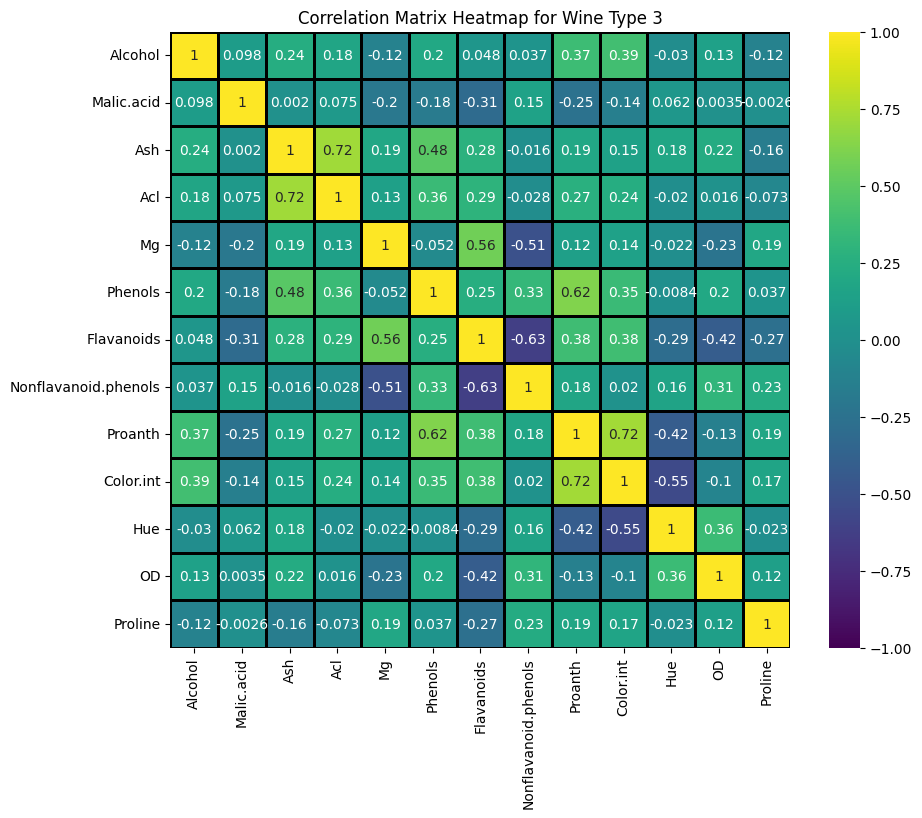

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

#l = 'inferno'

sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, linewidth=1.9, linecolor='black')
plt.title(f'Correlation Matrix Heatmap for Wine Type {num}')
plt.show()

Strong Positive Correlations (>|0.7|):
- Ash and Acl: 0.72
- Proanth and Color.int: 0.72
- Proanth and OD: 0.72 (noted earlier but relevant here as well)

Ash and Aclalinity of the ash are strongly positively correlated, suggesting that as the amount of Ash increases, the Alcalinity of the ash tends to increase as well. This could suggest that there is a common factor influencing both variables, or that they are components of a related process or feature. This could suggest, for instance, that increased ash content is linked to higher concentrations of a certain component in a chemical or material context that gives this measurement.

<br>

Moderate Positive Correlations (|0.4-0.7):
- Phenols and Flavanoids: 0.62
- Phenols and Color.int: 0.35
- Flavanoids and OD: 0.38

The moderate positive correlation between Phenols and Color Intensity indicates that increased phenol content is marginally correlated with increased color intensity. This implies that phenols have a role in the sample's color characteristics.

<br>

Strong Negative Correlations (>|0.7|):
- Flavanoids and Nonflavanoid.phenols: -0.63
- Proanth and Hue: -0.42

The strong negative correlation indicates an inverse relationship between Flavanoids and Nonflavanoid Phenols. Nonflavanoid Phenols tend to decrease with an increase in Flavanoids. This could imply that these two kinds of phenolic chemicals are antagonistic to one another or that they fight for comparable sources or pathways within the sample. Both cultivator 1 and 2 show this negative connection, however cultivator 1 does not. This leads to further speculation that it could be a difference in manufacturing processes, or even the quality or types of ingredients used in the making of the wine.

# 5. K-Means Clustering

K-Means clustering is an unsupervised learning algorithm. It is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations (Salazar, 2023).

In this exploration of the wine dataset, K-means clustering will be used to organise the data according to patterns and correlations between the three different cultivators.

The algorithm works as follows:  

1. First, we randomly initialize k points, called means or cluster centroids.
2. We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.


The number of cluster centroids for each k-means clustering graph will be determined using the elbow method to find the ideal number of groups to divide the data into.

Alongside this, the x and y axis attributes to explore with k-means clustering will be attributes with correlations previously explored in this report.

### Preparing the Dataset for K-Means Clustering

In [1091]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine_cluster = wine_data.copy()
wine_cluster.drop('Wine', axis=1, inplace=True)


scaler = StandardScaler()
 
features = scaler.fit(wine_cluster)
features = features.transform(wine_cluster)

# Convert to pandas Dataframe
scaled_df = pd.DataFrame(features, columns=wine_cluster.columns)

scaled_df.head(2)

X = scaled_df.values

### Elbow Method to find ideal number of centroids

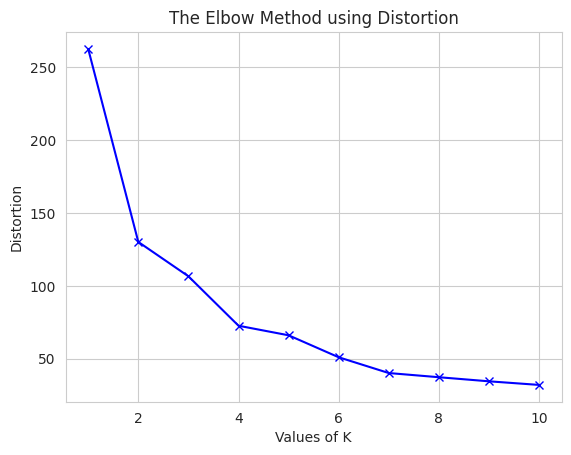

In [1092]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 11)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(wine_data)
    kmeanModel.fit(wine_data)
 
    distortions.append(sum(np.min(cdist(wine_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / wine_data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(wine_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / wine_data.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


With the elbow method, to determine the optimal number of clusters used for the data, we select the value of k at the "elbow". Or the point after which the distortion/intertia starts decreasing in near linear fashion. From the graph, it is observed that 3 is approximately when the points start to show in a linear fashion. Therefore, the number of clusters for the k-means clustering will be 3.

### Implementing K-Means Clustering

**Lloyd's algorithm** for K-Means Clustering:

1. Choose the number of clusters, k, that you want to create.
2. Initialize k cluster centroids randomly.
3. Assign each data point to the nearest centroid, creating k clusters.
4. Recalculate the centroids as the mean of all data points in each cluster.
5. Repeat steps 3 and 4 until convergence (centroids no longer change significantly) or for a specified number of iterations.

**Step 1 & 2 -** Define k and initiate the centroids

In [1093]:
def initiate_centroids(k, data):
    centroids = data.sample(k)
    return centroids

colnames = ['Ash', 'Acl', 'Alcohol', 'Phenols', 'Flavanoids', 'Hue', 'Color.int']

np.random.seed(42)
k = 3
df = pd.DataFrame(wine_data[colnames])
centroids = initiate_centroids(k, df)
centroids

,Ash,Acl,Alcohol,Phenols,Flavanoids,Hue,Color.int
19,2.56,15.2,13.64,2.70,3.03,0.96,5.5325
45,2.44,18.9,14.21,2.85,2.65,0.87,5.2400
140,2.70,21.0,12.93,1.54,0.50,0.77,4.6000


**Step 3 -** Calculate Distance

In [1094]:
def rsserr(a, b):
    """ Calculate the root of sum of squared errors. 
    a and b are numpy arrays """
    return np.square(np.sum((a-b)**2))

**Step 4 -** Assign Centroids

In [1095]:
def assign_centroids(data, centroids):
    k = centroids.shape[0]
    n = data.shape[0]

    assigns = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], data.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assigns.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assigns, assign_errors

In [1096]:
df['centroid'], df['error'] = assign_centroids(df, centroids)
df.head()

,Ash,Acl,Alcohol,Phenols,Flavanoids,Hue,Color.int,centroid,error
0,2.43,15.6,14.23,2.80,3.06,1.04,5.64,0,0.306757
1,2.14,11.2,13.20,2.65,2.76,1.05,4.38,0,316.190855
2,2.67,18.6,13.16,2.80,3.24,1.03,5.68,1,3.294951
3,2.50,16.8,14.37,3.85,3.49,0.86,7.80,0,95.690581
4,2.87,21.0,13.24,2.80,2.69,1.04,4.32,1,41.154791


**Step 5 -** Update centroid location

In [1097]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,Ash,Acl,Alcohol,Phenols,Flavanoids,Hue,Color.int
0,2.272060,15.428697,13.520476,2.729286,2.747619,1.055952,5.313214
1,2.366078,18.700103,13.133881,2.509811,2.372941,1.032353,5.025210
2,2.405095,22.007536,12.674887,1.950284,1.432969,0.854982,4.913367


**Step 6 -** Repeat steps 3-5

In [1098]:
def kmeans(data, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `data`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = data.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, data)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = assign_centroids(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = assign_centroids(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [1099]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[colnames], 3)

### **Plotting the Clusters**

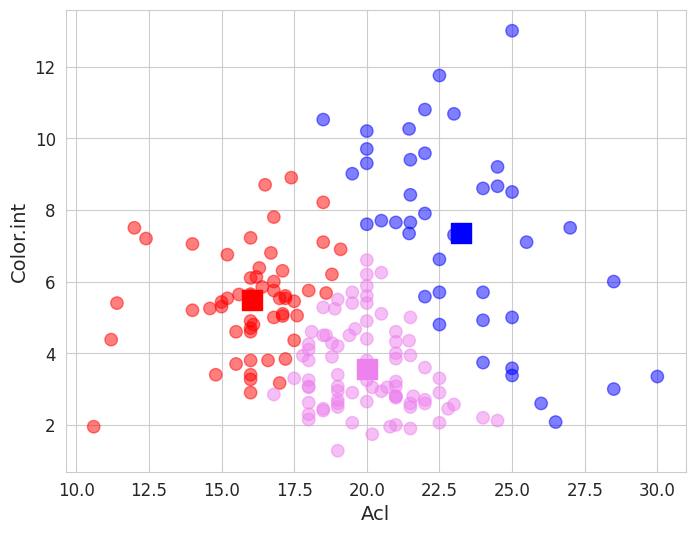

In [1100]:
def plotClusters(x, y):
    np.random.seed(42)
    df['centroid'], df['error'], centroids =  kmeans(df[colnames], 3)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(df.iloc[:,x], df.iloc[:,y],  marker = 'o', 
                c=df['centroid'].astype('category'), 
                cmap = customcmap, s=80, alpha=0.5)
    plt.scatter(centroids.iloc[:,x], centroids.iloc[:,y],  
                marker = 's', s=200, c=[0, 1, 2], 
                cmap = customcmap)
    ax.set_xlabel(f'{colnames[x]}', fontsize=14)
    ax.set_ylabel(f'{colnames[y]}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


x, y = 1, 6
plotClusters(x, y)
#colnames = ['Ash', 'Acl', 'Alcohol', 'Phenols', 'Flavanoids', 'Hue', 'Color.int']
#              0      1        2          3            4         5          6

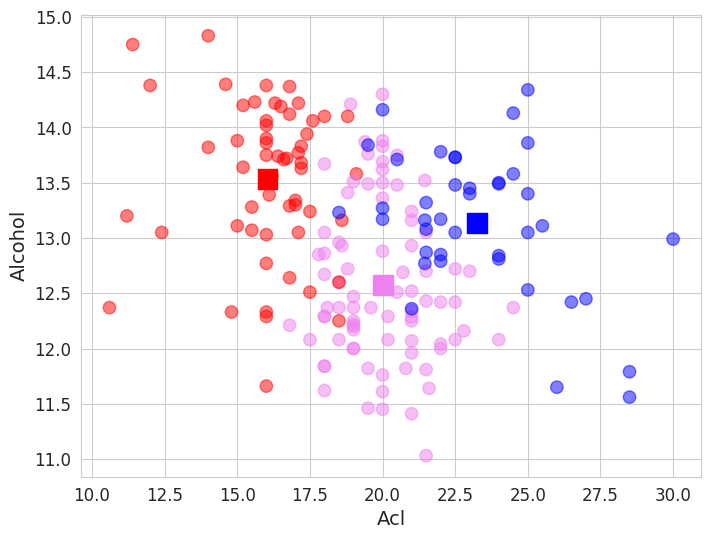

In [1104]:
x, y = 1, 2
plotClusters(x, y)
#colnames = ['Ash', 'Acl', 'Alcohol', 'Phenols', 'Flavanoids', 'Hue', 'Color.int']
#              0      1        2          3            4         5          6

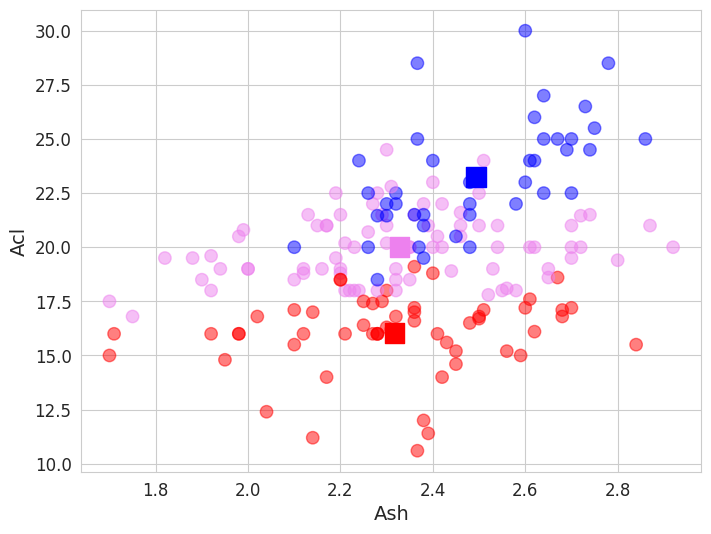

In [1107]:
x, y = 0, 1
plotClusters(x, y)
#colnames = ['Ash', 'Acl', 'Alcohol', 'Phenols', 'Flavanoids', 'Hue', 'Color.int']
#              0      1        2          3            4         5          6

**Observation** <br>
As the chosen k value for the k-means clustering was 3, this is observered to be the correct number of clusters to group the data into. This is further corroborated by the understanding of the wine dataset already being grouped into 3 groups, the three different cultivators. From both the Aclinity of Ash vs. Color.int, and the Aclinity of Ash and Alcohol scatter plots, 3 different groups can be seen. However, some issues with the k-means clustering has arisen as the clusters overlap. This is possibly due to limitations in k-means, or because the data was clustered over 7 attributes and then reducing the dimensionality to 2, has caused unncessary noise and clusters to not accurately represent where they are.

<br>

**Limitations:** <br>
K-Means clustering has limitations, with some being:
- It assumes spherical clusters. This means the data might not work with the clusters, as the data might not be broken up into blobs but rectangular or other less circular shapes. Like as seen in the Aclinity of Ash vs. Ash plot, where the clusters visually could be layered ontop of one another to create the clusters.

- Sensitive to Initialisation. When performing the k-means clustering, many initialisations were conducted as the clusters initial values would have caused massively incorrect clusters.

- Equal Sized Clusters. The wine dataset did not have equal sized groups, as cultivator 2 had 71 entries, cultivator 1 had 59, and cultivator 3 had 48. Leading to the possibility that some clusters have lost/gained information due to the large disparity. Which is believed to have caused some of the overlapping in clusters as seen in the plots above.

<br>

**Comparison with EDA** <br>
Looking at the plot of Ash vs. Aclinity, the k-means clustering has shows what was observed in the EDA, Mean and SD for Each Wine, and Correlations sections of this report. From the mean of the 3 cultivators, 3 groups could be infered from the statistical table. For all cultivators then mean Ash content was very similar ranging between 2.24 to 2.44, whereas the aclinity mean measurements were: cultivator 1 - 17.10, cultivator 2 - 20.18, cultivator 3 - 21.45. The k-means clustering graphically shows this as this plot has the three groups closely reflecting a layered pattern. With cultivator 1 on the bottom (red), then cultivator 2 in the middle (purple), then cultivator 3 on top (blue). From the correlation tables of cultivators 2 and 3, ash vs. aclinity had moderate, and strong postitive correlations, seen from cultivator's 3 distinct linear rising.

Furthermore, looking at the plot of Aclinity vs. Alcohol, the k-means clustering has shown expected groupings from the previous exploration in this report. The mean value of alcohol was once again similar between cultivators: wine 1 - 13.74, wine 2 - 12.28, wine 3 - 13.16. The centroids on the plot (shown with coloured squares), do not accurately match these means. This is thought to be due to the limitations of the k-means as the dimensionality is high, however, the centroids are accurate to the means within +/- 0.2 and well within the standard deviation of the data. The clusters around the centroids are not very dense, and spread vertically. This is because the Aclinity means range in distinct groups horizontally, with the rectangular shape of the cluster. This was according to data as the mean values for aclinity are: wine 1 - 17.10 (red), wine 2 - 20.18 (purple), wine 3 - 21.45 (blue).


# 6. Principal Component Analysis

### What is Principal Component Analysis?

Prinicpal component anlysis (PCA) is a statistical technique used to identify patterns in data by transforming the original variables into a set of principal components. Principal components are new variables that are constructed as linear combinations or mixtures of the inital variables, constructed in a way that the new variables are uncorrelated (Jaadi, 2024).


### How PCA Works?
1. Standardisation: The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
2. Covariance Matrix Computation: begins by calculating the covariance matrix of the data, which captures the relationships between variables.
3. Eigenvalue and Eigenvector Computation: Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.
4. Selecting Principal Components: Principal Components are ranked by their corresponding eigenvalues.
5. Transformation: The original data is then projected onto the selected principal components.


### Performing PCA

Code inspiration from Geeks for Geeks (2024).

#### Standarise the Data

In [1135]:
df1 = pd.DataFrame(wine_data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

#### Compute the Covariance Matrix

In [1136]:
import numpy as np
cov_matrix = np.cov(X_scaled, rowvar=False)

#### Compute the Eigenvalues and Eigenvectors

In [1137]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#### Sort Eigenvalues and Eigenvectors

In [1138]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#### Selecting the Top k Principal Components

In [1172]:
k = 4  # Number of principal components to keep
top_k_eigenvectors = sorted_eigenvectors[:, :k]

#### Transforming the Data

In [1173]:
X_pca = X_scaled.dot(top_k_eigenvectors)

#### Interpreting the Results

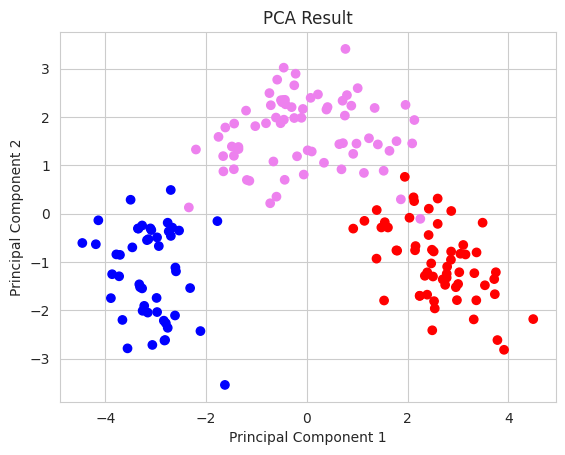

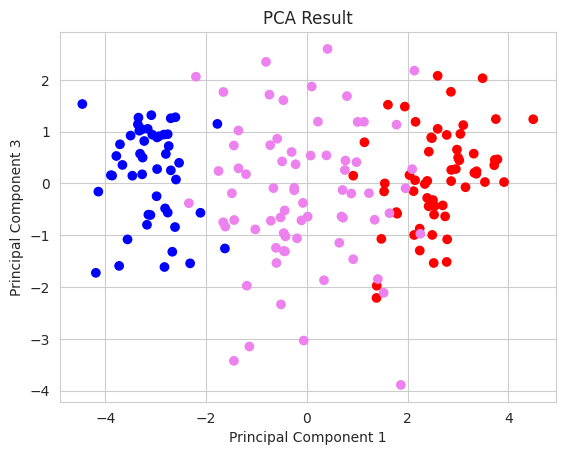

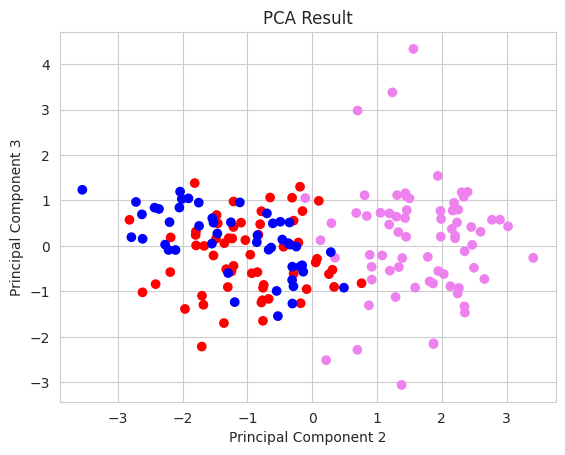

In [1177]:
import matplotlib.pyplot as plt

y = np.array(wine_data['Wine'])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=customcmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap=customcmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

plt.scatter(X_pca[:, 1], X_pca[:, 3], c=y, cmap=customcmap)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

Now that PCA has been conducted on the wine data. The data has been better visually grouped. From the preivous k-means clustering, the limitations had an impact on visualising the data. Due to the large amount of dimensions (attributes) of the data, there was lots of noise interfering with the clustering. PCA has reduced the dimensionality of the data to make it easier to view in 2 dimensions, or 2 attributes.

The scatter plot is showing the data in 3 groups. The blue group is wine cultivator 1, purple group is wine cultivator 2, and red group is wine cultivator 3.


The third scatter plot of PCA shows the relationship between principal component 2 and principal component 3. This data shows for these components, wine cultivator 1 and 3 are very similar.

#### Limitations

As the PCA conducted has been used for dimensionality reduction, this comes with an inherent loss of data and accuracy. As it is removing redundant information and reducing the complexity of the data. Meaning that the scatter plot shown in the data might not contain all the correlations between the attributes or has removed/reduced the data with the attributes that create the correlations.

## References

Visioli, F., Panaite, S.A., & Tomé-Carneiro, J. (2020). Wine’s Phenolic Compounds and Health: A Pythagorean View. *National Library of Medicine*. https://doi.org/10.3390/molecules25184105


Green, A. (2015). *Does the Color of Wine Determine the Alcohol by Content?* Andy Green Law. https://www.andygreenlaw.com/dui/does-the-color-of-wine-determine-the-alcohol-by-content/


Hale, N. (2024). *What is Acidity in Wine?* Wine Enthusiast. https://guides.library.uq.edu.au/referencing/apa7/webpage


Bonin, S. (2014) Effects of magnesium ions on both VHG batch and continuous fruit wine fermentations. *Journal of the Institute of Brewing* 120,4. 477-485. https://doi.org/10.1002/jib.170


Nandorfy. D.E., Watson, F., Likos, D., Siebert, T., Bindon, K., Kassara, S., Shellie, R., Keast, R., & Francis, I.L. (2022) Influence of amino acids, and their interaction with volatiles and polyphenols, on the sensory properties of red wine. *Australian Journal of Grape and Wine Research*. 28,4. 621-637. https://doi.org/10.1111/ajgw.12564


Salazar, J.R. (2023). *Getting started with K-means clustering in Python*. Domino. https://domino.ai/blog/getting-started-with-k-means-clustering-in-python


Jaadi, Z. (2023). *Principal Component Analysis (PCA): A Step-by-Step Explanation*. Builtin. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Geeks for Geeks. (2024). *Principal Component Analysis (PCA)*. https://www.geeksforgeeks.org/principal-component-analysis-pca/

